# Input Data Pipeline

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(50)
tf.random.set_seed(50)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/smoke_detection_iot.csv')
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [ ]:
df = data.drop(columns=['Unnamed: 0','UTC'])
df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


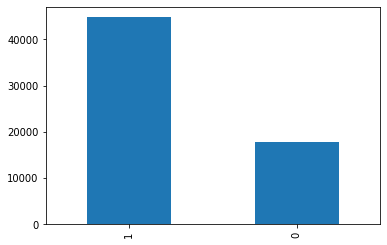

In [ ]:
df['Fire Alarm'].value_counts().plot(kind='bar')

In [ ]:
df_0 = df[df['Fire Alarm']==0]
df_1 = df[df['Fire Alarm']==1]
df_1 = df_1.sample(len(df_0))
df_samp = pd.concat([df_0,df_1])
df_samp = df_samp.sample(len(df_samp)).reset_index(drop=True)
df_samp

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,28.760,42.06,149,413,12775,20568,937.311,1.88,1.95,12.92,2.014,0.045,2445,0
1,17.330,56.85,3250,400,13265,19799,936.942,0.40,0.42,2.78,0.433,0.010,4085,0
2,21.280,60.62,693,691,12784,19563,939.167,2.58,2.68,17.76,2.770,0.063,9598,1
3,25.424,57.01,10,400,12788,19790,939.824,0.30,0.33,1.99,0.344,0.028,511,0
4,-0.471,56.07,946,696,12784,19504,939.096,2.41,2.50,16.58,2.585,0.058,10331,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35741,-9.041,46.30,89,400,12777,20636,937.492,2.16,2.24,14.86,2.317,0.052,1205,0
35742,14.071,46.00,144,400,13158,20032,939.681,0.96,1.00,6.61,1.031,0.023,2798,0
35743,26.000,47.30,141,417,12779,20582,937.345,1.93,2.01,13.29,2.073,0.047,1988,0
35744,17.890,53.45,60,400,13193,20106,939.646,0.88,0.92,6.08,0.948,0.021,2590,0


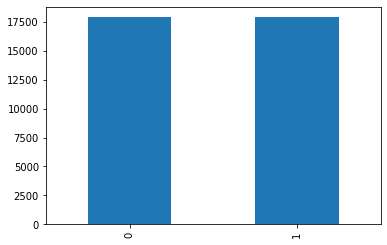

In [ ]:
df_samp['Fire Alarm'].value_counts().plot(kind='bar')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_samp.drop(columns='Fire Alarm'), df_samp['Fire Alarm'], train_size=0.9, stratify=df_samp['Fire Alarm'])
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.8, stratify=y_train)

In [ ]:
X_train.shape

(25736, 13)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(13, activation='relu', input_shape=(X_train.shape[1],),kernel_initializer='HeNormal',kernel_regularizer='l2')) #input layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(183, activation='relu')) #hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer

In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 13)                182       
                                                                 
 batch_normalization_34 (Bat  (None, 13)               52        
 chNormalization)                                                
                                                                 
 dense_54 (Dense)            (None, 183)               2562      
                                                                 
 batch_normalization_35 (Bat  (None, 183)              732       
 chNormalization)                                                
                                                                 
 dropout_17 (Dropout)        (None, 183)               0         
                                                                 
 dense_55 (Dense)            (None, 1)               

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=16, validation_data=(X_val_scaled,y_val))

Epoch 1/10
1609/1609 [==============================] - 9s 5ms/step - loss: 0.1739 - accuracy: 0.9777 - val_loss: 0.0743 - val_accuracy: 0.9911
Epoch 2/10
1609/1609 [==============================] - 8s 5ms/step - loss: 0.0645 - accuracy: 0.9913 - val_loss: 0.0417 - val_accuracy: 0.9963
Epoch 3/10
1609/1609 [==============================] - 12s 8ms/step - loss: 0.0395 - accuracy: 0.9947 - val_loss: 0.0253 - val_accuracy: 0.9986
Epoch 4/10
1609/1609 [==============================] - 11s 7ms/step - loss: 0.0293 - accuracy: 0.9958 - val_loss: 0.0239 - val_accuracy: 0.9986
Epoch 5/10
1609/1609 [==============================] - 7s 5ms/step - loss: 0.0255 - accuracy: 0.9968 - val_loss: 0.0451 - val_accuracy: 0.9963
Epoch 6/10
1609/1609 [==============================] - 7s 5ms/step - loss: 0.0230 - accuracy: 0.9969 - val_loss: 0.0601 - val_accuracy: 0.9961
Epoch 7/10
1609/1609 [==============================] - 8s 5ms/step - loss: 0.0212 - accuracy: 0.9972 - val_loss: 0.0762 - val_accurac

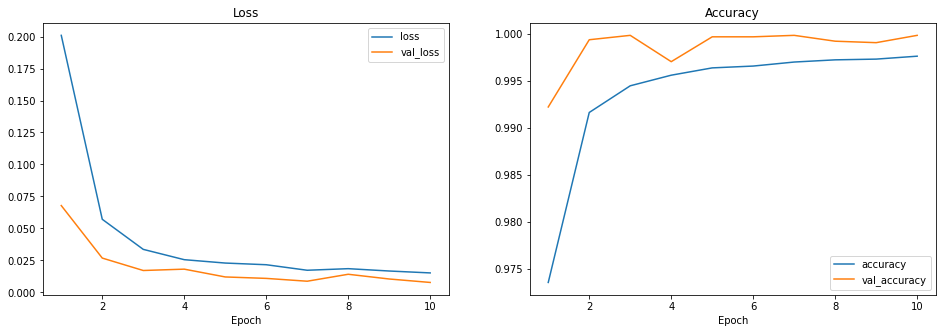

In [ ]:
epoch=10

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

### Input Data Pipeline

In [ ]:
test = [0,1,2,3,4,5,6,7,8]

### batch

In [ ]:
input_pipe = tf.data.Dataset.from_tensor_slices(test).batch(2)

for row in input_pipe.take(3):
  print(row)

tf.Tensor([0 1], shape=(2,), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)
tf.Tensor([4 5], shape=(2,), dtype=int32)


### shuffle

In [ ]:
input_pipe = tf.data.Dataset.from_tensor_slices(test).shuffle(2)

for row in input_pipe:
  print(row)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
input_pipe = tf.data.Dataset.from_tensor_slices(test).repeat(2)

for row in input_pipe:
  print(row)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [ ]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_scaled,y_train)).batch(16).repeat(3).shuffle(100)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test_scaled,y_test)).batch(16)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_scaled,y_val)).batch(16)

In [ ]:
for row in train_pipe.take(1):
  print(row)

(<tf.Tensor: shape=(16, 13), dtype=float64, numpy=
array([[ 0.66504235,  0.05974119, -0.16654709, -0.10385215, -0.24958002,
        -0.49729013,  0.33378857, -0.13560791, -0.11785876, -0.14160388,
        -0.1161418 , -0.0930302 ,  0.65332177],
       [-1.36068794, -0.00380089, -0.26059056, -0.162134  , -0.43855026,
         1.07988722, -0.70268266, -0.13520041, -0.11765147, -0.14101536,
        -0.11595008, -0.09302124, -0.95962263],
       [-0.38867511,  0.66876758, -0.16376701, -0.05818353, -0.37855971,
        -0.52114659,  0.45955921, -0.13505867, -0.11757805, -0.14081796,
        -0.11588514, -0.09301798,  0.45659818],
       [ 0.67784274,  0.48009648, -0.26835562, -0.162134  ,  0.29633401,
         0.11237507,  0.9830984 , -0.1370253 , -0.11857134, -0.14362588,
        -0.11680279, -0.09306196, -0.95813742],
       [-1.79229268,  0.79682931, -0.26480862, -0.162134  ,  0.95023103,
         0.47287275,  0.92703198, -0.13517383, -0.11763419, -0.14097108,
        -0.11593539, -0.093

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(13, activation='relu',input_shape=(13,),kernel_initializer='HeNormal',kernel_regularizer='l2')) #input layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(183, activation='relu')) #hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 13)                182       
                                                                 
 batch_normalization_40 (Bat  (None, 13)               52        
 chNormalization)                                                
                                                                 
 dense_63 (Dense)            (None, 183)               2562      
                                                                 
 batch_normalization_41 (Bat  (None, 183)              732       
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 183)               0         
                                                                 
 dense_64 (Dense)            (None, 1)               

In [ ]:
history = model.fit(train_pipe, epochs=10,validation_data=val_pipe)

Epoch 1/10
4827/4827 [==============================] - 21s 4ms/step - loss: 0.0884 - accuracy: 0.9888 - val_loss: 0.0603 - val_accuracy: 0.9952
Epoch 2/10
4827/4827 [==============================] - 20s 4ms/step - loss: 0.0207 - accuracy: 0.9974 - val_loss: 0.0282 - val_accuracy: 0.9978
Epoch 3/10
4827/4827 [==============================] - 20s 4ms/step - loss: 0.0152 - accuracy: 0.9979 - val_loss: 0.0110 - val_accuracy: 0.9991
Epoch 4/10
4827/4827 [==============================] - 21s 4ms/step - loss: 0.0128 - accuracy: 0.9983 - val_loss: 0.0183 - val_accuracy: 0.9974
Epoch 5/10
4827/4827 [==============================] - 20s 4ms/step - loss: 0.0133 - accuracy: 0.9982 - val_loss: 0.0115 - val_accuracy: 0.9988
Epoch 6/10
4827/4827 [==============================] - 20s 4ms/step - loss: 0.0121 - accuracy: 0.9982 - val_loss: 0.1133 - val_accuracy: 0.9939
Epoch 7/10
4827/4827 [==============================] - 20s 4ms/step - loss: 0.0121 - accuracy: 0.9984 - val_loss: 0.0158 - val_ac